In [1]:
import os, random

from utils import *
import gzip
import shutil

import nibabel as nib
from intensity_normalization.typing import Modality, TissueType
from intensity_normalization.normalize.fcm import FCMNormalize

In [34]:
source = 'Resampled/'
target = 'Skull_stripped/'

diags = ['AD', 'CN']
for diag in diags:
    for path, dirs, files in os.walk(os.path.join(source, diag)):
        for filename in files:
            if filename == '.DS_Store': continue
            image = os.path.join(source, diag, filename)
            dest_img = os.path.join(target, diag, filename)
            skull_strip_nii(image, dest_img, frac=0.5)

            # Unzip all gz files to get nii format
            archive = os.path.join(dest_img + '.gz')
            with gzip.open(archive, 'rb') as f_in:
                with open(dest_img, 'wb') as f_out:
                    shutil.copyfileobj(f_in, f_out)

            # Delete all archives
            os.remove(archive)

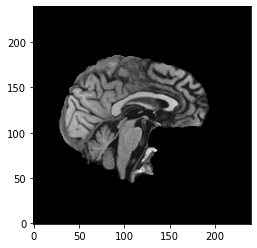

(240, 240, 199)


In [49]:
path = os.path.join(target, "CN/")
filename = random.choice(os.listdir(path))
#filename = 'ADNI_002_S_0413_MR_MP-RAGE__br_raw_20060502142705523_1_S13893_I14437.nii'

display(path, filename, 100, sagitall=True)

In [ ]:
croped = trim(filename, filename!=0)
croped = preprocessing.resize_image_with_crop_or_pad(croped, img_size=(192,192,192))

In [7]:
source = 'Skull_stripped/'
target = 'S_C/'
diags = ['AD', 'CN']

for diag in diags:
    for path, dirs, files in os.walk(os.path.join(source, diag)):
        for filename in files:
            if filename == '.DS_Store': continue
            image = os.path.join(source, diag, filename)
            img = sitk.ReadImage(image)
            arr = sitk.GetArrayFromImage(img)
            croped = trim(arr, arr!=0)
            croped = preprocessing.resize_image_with_crop_or_pad(croped, img_size=(128,128,96))
            res_img = sitk.GetImageFromArray(croped)
            complete_new_path = os.path.join(target, diag, filename)
            sitk.WriteImage(res_img, complete_new_path)

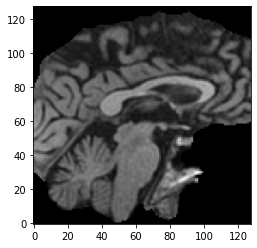

0.0
6594.0
(128, 128, 96)


In [8]:
path = os.path.join(target, "AD/")
filename = random.choice(os.listdir(path))
display(path, filename, 50, sagitall=True)

In [20]:
diags = ['AD', 'CN']
min_ax = 500
min_cor = 500
min_sag = 500

for diag in diags:
    for path, dirs, files in os.walk(os.path.join(target,diag)):
        for filename in files:
            if filename == '.DS_Store': continue
            file = sitk.ReadImage(os.path.join(target, diag, filename))
            img = sitk.GetArrayFromImage(file)
            print(img.shape)
            print(filename)
            if img.shape[0] < min_ax:
                min_ax = img.shape[0]
            if img.shape[1] < min_cor:
                min_cor = img.shape[1]
            if img.shape[2] < min_sag:
                min_sag = img.shape[2]
                #print(filename)

(128, 128, 96)
ADNI_033_S_1087_MR_MP-RAGE__br_raw_20061121100132377_1_S22739_I30220.nii
(128, 128, 96)
ADNI_002_S_1018_MR_MP-RAGE__br_raw_20061129230229806_1_S23128_I30875.nii
(128, 128, 96)
ADNI_033_S_1285_MR_MP-RAGE__br_raw_20080829130314929_3_S56093_I117266.nii
(128, 128, 96)
ADNI_098_S_0149_MR_MP-RAGE__br_raw_20060122175736562_1_S11021_I10146.nii
(128, 128, 96)
ADNI_006_S_0653_MR_MP-RAGE__br_raw_20060705140828562_1_S16073_I17867.nii
(128, 128, 96)
ADNI_116_S_0392_MR_MP-RAGE__br_raw_20060606130916062_8_S15287_I16627.nii
(128, 128, 96)
ADNI_098_S_0884_MR_MP-RAGE__br_raw_20061218120402874_1_S24184_I33576.nii
(128, 128, 96)
ADNI_005_S_0929_MR_MP-RAGE__br_raw_20070508160420844_1_S31919_I53858.nii
(128, 128, 96)
ADNI_033_S_1308_MR_MP-RAGE__br_raw_20070214153211802_1_S26473_I40114.nii
(128, 128, 96)
ADNI_006_S_0547_MR_MP-RAGE__br_raw_20070924144034890_1_S39856_I74883.nii
(128, 128, 96)
ADNI_007_S_0316_MR_MP-RAGE__br_raw_20060330141641803_94_S12582_I12616.nii
(128, 128, 96)
ADNI_007_S_1248

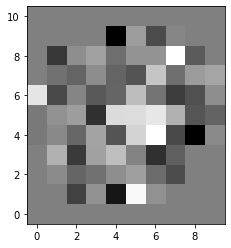

(11, 10, 8)


In [17]:
filename='ADNI_002_S_0559_MR_MP-RAGE__br_raw_20060524075551726_1_S14875_I15948.nii'
path = os.path.join(target, "CN/")
display(path, filename,5, sagitall=True)

In [10]:
source = 'S_C/'
target = 'Normalized/'

diags = ['AD', 'CN']
for diag in diags:
    for path, dirs, files in os.walk(os.path.join(source, diag)):
        for filename in files:
            if filename == '.DS_Store': continue
            new_image = nib.load(os.path.join(source, diag, filename))
            fcm_norm = FCMNormalize(tissue_type=TissueType.WM)
            normalized = fcm_norm(new_image.get_fdata())
            # you can save the normalized image with nibabel as follows:
            nib.Nifti1Image(normalized, new_image.affine).to_filename(os.path.join(target, diag, filename))

            #image = os.path.join(source, diag, filename)
            #dest_img = os.path.join(target, diag, filename)
            #skull_strip_nii(image, dest_img, frac=0.5)


/Users/bax/opt/anaconda3/envs/mri_env/lib/python3.9/site-packages/intensity_normalization/normalize/base.py:89: UserWarning: Data contains negative values; skull-stripped functionality assumes the foreground is all positive. Provide the brain mask if otherwise.
  warnings.warn(msg)


In [19]:
path = os.path.join(target, "CN/")
#filename = random.choice(os.listdir(path))
filename = "ADNI_002_S_0413_MR_MP-RAGE__br_raw_20060502142705523_1_S13893_I14437.nii"
display(path, filename, 20, sagitall=True)

RuntimeError: Exception thrown in SimpleITK ImageFileReader_Execute: /Users/runner/work/1/sitk/Code/IO/src/sitkImageReaderBase.cxx:97:
sitk::ERROR: The file "Normalized/CN/ADNI_002_S_0413_MR_MP-RAGE__br_raw_20060502142705523_1_S13893_I14437.nii" does not exist.